# Lab | Data cleaning and wrangling
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## Instructions
So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
- One hot to state
- Ordinal to coverage
- Ordinal to employmentstatus
- Ordinal to location code
- One hot to marital status
- One hot to policy type
- One hot to policy
- One hot to renew offercustomer_df
- One hot to sales channel
- One hot vehicle class
- Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
- given that column "coverage" in the dataframe "data" has three categories:
- "basic", "extended", and "premium" and values are to be represented in the same order.

### 1. Import the necessary libraries.

In [382]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("pastel", 8)
from ydata_profiling import ProfileReport

%matplotlib inline

from scipy.stats import chi2_contingency
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))

In [383]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. First, look at its main features (head, shape, info).

In [384]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [385]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [386]:
df.shape

(9134, 24)

In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 4. Rename the columns so they follow the PE8 (snake case).

In [388]:
# Standardize column names (lowercase, replace spaces with underscore)
def standard_cols(dataframe):
    '''Standardize column names into lowercase and replace spaces with underscore.'''
    dataframe.columns = [col.lower().replace(' ','_') for col in dataframe.columns]
standard_cols(df)
df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 5. Fix the data types of any other column/columns as you might see necessary. 
Note that sometimes there are some features you might want to use as categorical, but they are read as numerical by python (and vice versa). For eg., if there's a column with year values like 2020, 2021, 2022, etc., this column might be read as numerical by python, but you would want to use that column as categorical data. Hint: One thing you can try is to change date column to datetime format.

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

#### Numerical Variables

In [390]:
numericals = df.select_dtypes(np.number).round(2)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274,69,32,5,0,1,384.81
1,6979.54,0,94,13,42,0,8,1131.46
2,12887.43,48767,108,18,38,0,2,566.47
3,7645.86,0,106,18,65,0,7,529.88
4,2813.69,43836,73,12,44,0,1,138.13


In [391]:
#Checking unique values of several columns to decide which ones to transform, if any

In [392]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


**Considering customer lifetime value as the target, we can see above a slightly positive relationship between this target and monthly_premium_auto (amount paid for car insurance coverage) and total_claim_amount.**

#### **Observations:**
- Most of the variables are skewed to the right. 
- There are a lot of 0 values in the income column which could be treated later by imputation or regression.
- Majority of the clients do not have any open complaints which is good for the insurance company.

### 8. Do the same with the categorical variables.
Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required.

In [393]:
categoricals = df.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


**It is important to delete customer_id before plotting since it is a column with unique values.**

In [394]:
#drop columns with high cardinality before plotting
drop_cols = ['customer', 'effective_to_date']
categoricals.drop(drop_cols, axis=1, inplace=True)

In [395]:
for col in numericals.columns:
    print(col, ": ", (numericals[numericals[col] == 0].shape[0]))

customer_lifetime_value :  0
income :  2317
monthly_premium_auto :  0
months_since_last_claim :  314
months_since_policy_inception :  83
number_of_open_complaints :  7252
number_of_policies :  0
total_claim_amount :  0


**There are no null values in the dataframe. However, looking at the we can see that there are some 0 values in some columns. Only the income column containing these missing values will be treated as it makes sense for the others to have 0 values.**

## Data cleaning and wrangling

### Numerical Variables

In [396]:
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.52,56274,69,32,5,0,1,384.81
1,6979.54,0,94,13,42,0,8,1131.46
2,12887.43,48767,108,18,38,0,2,566.47
3,7645.86,0,106,18,65,0,7,529.88
4,2813.69,43836,73,12,44,0,1,138.13


**Continuous Variables**
- customer_lifetime_value
- income (0s will be replaced by polynomial imputation)
- monthly_premium_auto
- total_claim_amount

**Discrete Variables** these can be considered ordinal categorical variables
- months_since_last_claim
- months_since_policy_inception
- number_of_open_complaints
- number_of_policies

In [397]:
# Separate continuous and discrete variables

In [398]:
num = numericals[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']]
ord = numericals[['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']]

In [399]:
num.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.52,56274,69,384.81
1,6979.54,0,94,1131.46
2,12887.43,48767,108,566.47
3,7645.86,0,106,529.88
4,2813.69,43836,73,138.13


In [400]:
ord.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1


In [401]:
# Deal with 0s in the income column by interpolation
num.income.eq(0).sum()

2317

In [402]:
df_0income = df[df.income == 0]
print(df_0income.groupby('employmentstatus')['income'].value_counts())

employmentstatus  income
Unemployed        0         2317
Name: income, dtype: int64


As there are 0 values in the income column, checking if it has any connection with the employment status is a good first step. True enough, those who have 0 income are unemployed.

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

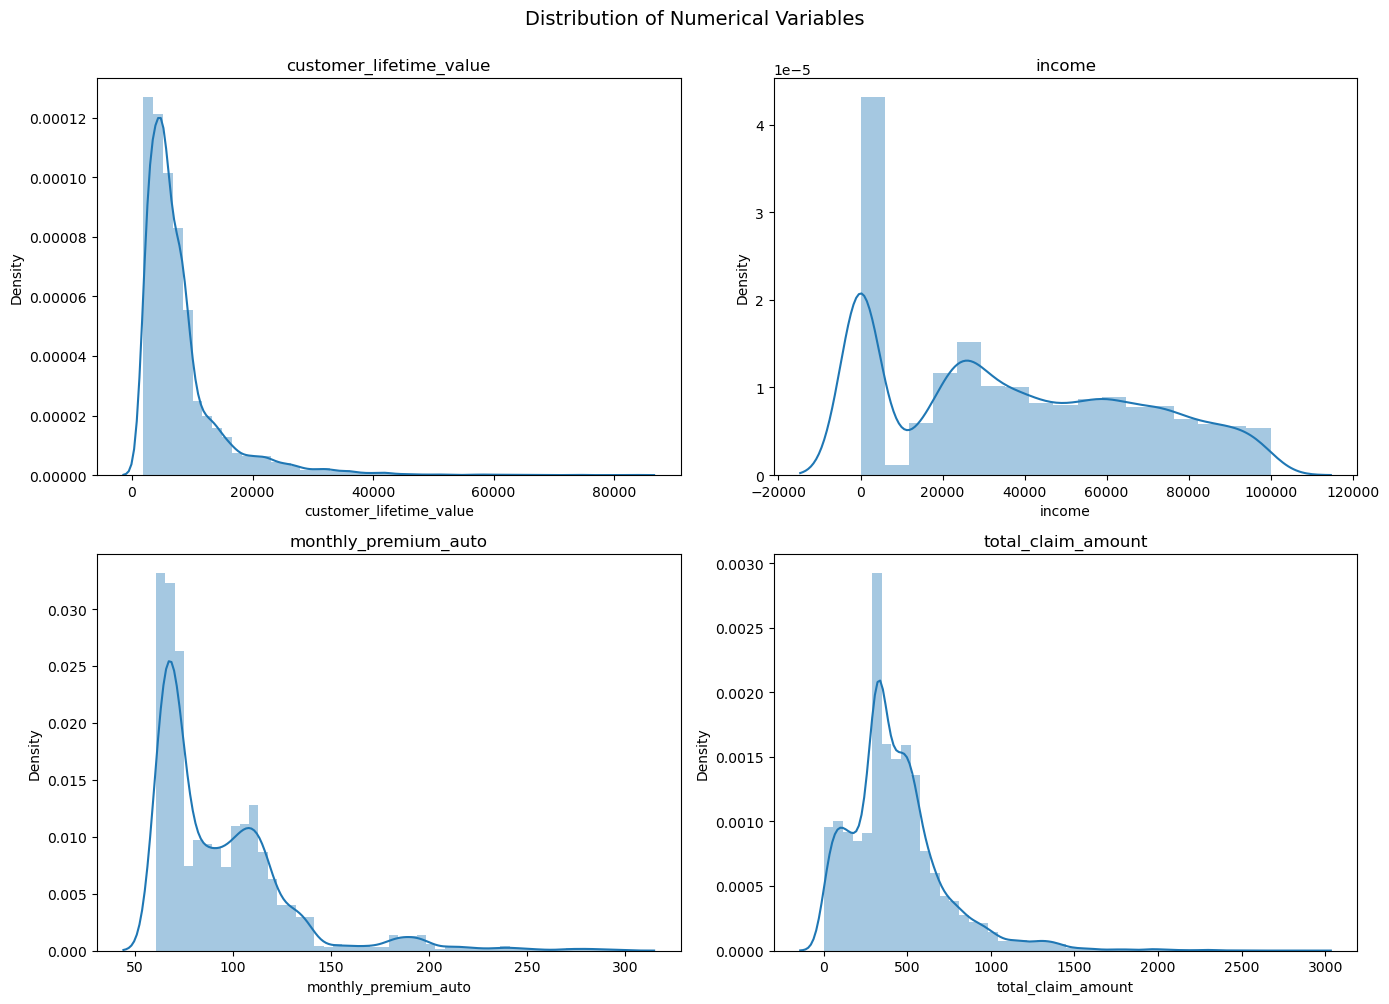

In [403]:
a = 2  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (14,10))
plt.suptitle("Distribution of Numerical Variables", fontsize = 14, y=1)

for i in num:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(num[i])
    c = c + 1
    
plt.tight_layout()
plt.show()

In [404]:
# first transform 0s to NaNs, otherwise interpolation will not work
new_income= num.income.apply(lambda x: np.nan if x == 0 else x)
new_income.isna().sum()

2317

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

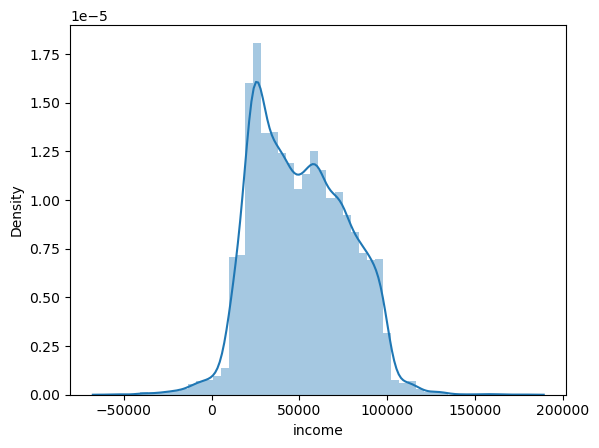

In [405]:
# then apply necessary interpolation. based on the distribution, polynomial order 3 will be used
new_income_poly = new_income.interpolate(method='polynomial', order=3)
sns.distplot(new_income_poly)

In [406]:
new_income_poly

0       56274.00000
1       59108.77380
2       48767.00000
3       39069.22620
4       43836.00000
           ...     
9129    71941.00000
9130    21604.00000
9131   -37380.00397
9132    21941.00000
9133            NaN
Name: income, Length: 9134, dtype: float64

After interpolation, the distribution looks more normal. However we do get negative values. Does this make sense considering we are talking about income??? Please enlighten me.🙏🏻

In [407]:
# create new df copy of the numerical variables and replace the income values with the interpolated ones
num_new = num.copy()
num_new.income = new_income_poly

In [408]:
num_new.isna().sum()

customer_lifetime_value    0
income                     1
monthly_premium_auto       0
total_claim_amount         0
dtype: int64

In [409]:
num_new.dropna(inplace=True)

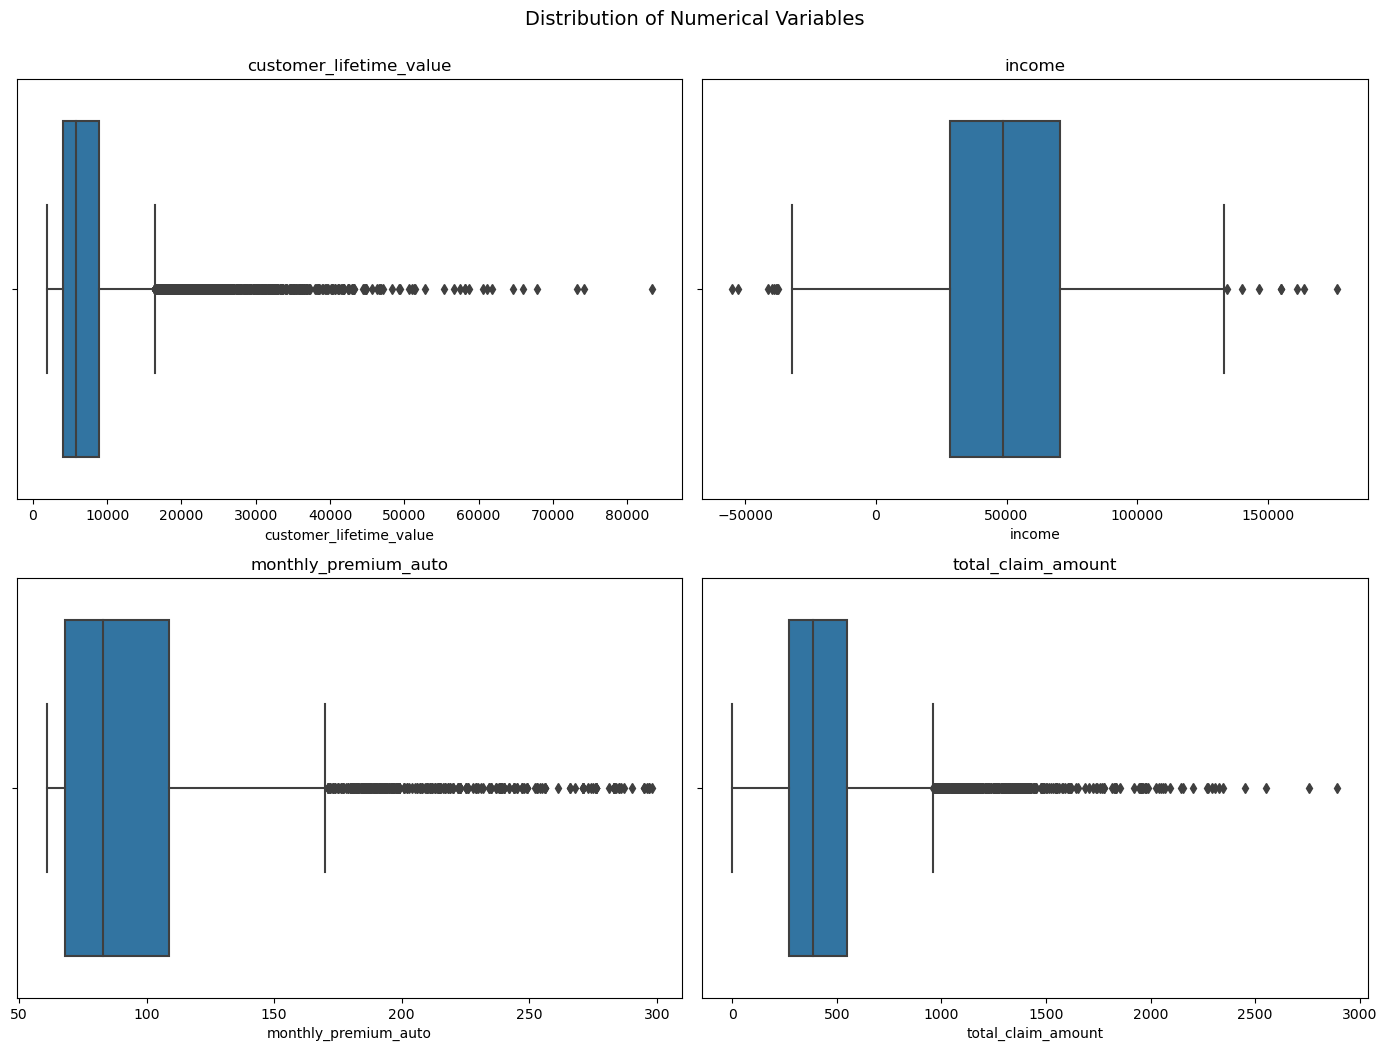

In [410]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize = (14,20))
plt.suptitle("Distribution of Numerical Variables", fontsize = 14, y=1)

for i in num_new:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(data = num_new, x = i)
    c = c + 1
    
plt.tight_layout()
plt.show()

In [411]:
# Calculate the interquartile range
q1 = np.percentile(num_new.income, 25)
q3 = np.percentile(num_new.income, 75)
iqr = round(q3-q1,2)
iqr

42078.62

In [412]:
# Setting limits
upper_limit = (q3 + (1.5* iqr)).round(2)
lower_limit = (q1 - (1.5 * iqr)).round(2)
upper_limit, lower_limit

(133701.55, -34612.93)

In [413]:
# How many are considered outliers
(num_new.income < lower_limit).sum() + (num_new.income > upper_limit).sum()

16

In [414]:
#Drop the outliers from the dataframe
num_new2 = num_new[(num_new['income']>lower_limit) & (num_new['income']<upper_limit)]
num_new2.describe().round(2)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
count,9117.00,9117.00,9117.00,9117.00
mean,8006.05,50486.91,93.19,433.40
std,6873.57,26042.92,34.40,289.72
min,1898.01,-31935.02,61.00,0.10
25%,3996.77,28513.00,68.00,271.70
50%,5780.18,48567.00,83.00,383.36
75%,8962.80,70503.00,109.00,547.20
max,83325.38,133249.93,298.00,2893.24


### Normalize Continuous Numerical Variables

In [415]:
# Separate the target before normalizing the continuous variables
y = num_new2['customer_lifetime_value']
y.head()

0     2763.52
1     6979.54
2    12887.43
3     7645.86
4     2813.69
Name: customer_lifetime_value, dtype: float64

In [416]:
X_num = num_new2.drop('customer_lifetime_value', axis=1)
X_num.head()

,income,monthly_premium_auto,total_claim_amount
0,56274.0000,69,384.81
1,59108.7738,94,1131.46
2,48767.0000,108,566.47
3,39069.2262,106,529.88
4,43836.0000,73,138.13


In [417]:
transformer = StandardScaler().fit(X_num)
x_standardized = transformer.transform(X_num)
x_standardized = pd.DataFrame(x_standardized, columns=X_num.columns)
x_standardized.head()

,income,monthly_premium_auto,total_claim_amount
0,0.222226,-0.703351,-0.167728
1,0.331082,0.023516,2.409554
2,-0.066045,0.430562,0.459325
3,-0.438442,0.372412,0.333024
4,-0.255397,-0.587052,-1.019216


### Ordinal Categorical Variables

In [418]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 999.2+ KB


In [419]:
ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   months_since_last_claim        9134 non-null   int64
 1   months_since_policy_inception  9134 non-null   int64
 2   number_of_open_complaints      9134 non-null   int64
 3   number_of_policies             9134 non-null   int64
dtypes: int64(4)
memory usage: 285.6 KB


Categorical Variables to be transformed to ordinal:
- coverage
- employmentstatus
- location code
- vehicle size

In [420]:
# Columns to move categorical df to ord as they will be transformed to ordinal categorical variables
ordinal = ['coverage', 'employmentstatus', 'location_code', 'vehicle_size', 'education']
cat_ord = categoricals[ordinal]
cat_ord.head()

,coverage,employmentstatus,location_code,vehicle_size,education
0,Basic,Employed,Suburban,Medsize,Bachelor
1,Extended,Unemployed,Suburban,Medsize,Bachelor
2,Premium,Employed,Suburban,Medsize,Bachelor
3,Basic,Unemployed,Suburban,Medsize,Bachelor
4,Basic,Employed,Rural,Medsize,Bachelor


In [421]:
# coverage column (copied from lab instructions)
cat_ord["coverage"] = cat_ord["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_19601/3725452896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_ord["coverage"] = cat_ord["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})


In [422]:
cat_ord["coverage"].value_counts()

0    5568
1    2742
2     824
Name: coverage, dtype: int64

In [423]:
# location_code column 
cat_ord["location_code"] = cat_ord["location_code"].apply(lambda x: 0 if x == 'Rural' else (1 if x == 'Suburban' else 2))

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_19601/386551034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_ord["location_code"] = cat_ord["location_code"].apply(lambda x: 0 if x == 'Rural' else (1 if x == 'Suburban' else 2))


In [424]:
cat_ord["location_code"].value_counts()

1    5779
0    1773
2    1582
Name: location_code, dtype: int64

In [425]:
# vehicle_size column 
cat_ord["vehicle_size"] = cat_ord["vehicle_size"].map({'Small': 0,'Medsize': 1, 'Large': 2})

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_19601/4070956097.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_ord["vehicle_size"] = cat_ord["vehicle_size"].map({'Small': 0,'Medsize': 1, 'Large': 2})


In [426]:
cat_ord["vehicle_size"].value_counts()

1    6424
0    1764
2     946
Name: vehicle_size, dtype: int64

In [427]:
#employmentstatus column
cat_ord.employmentstatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [428]:
def order_employment(x):
    if x == 'Unemployed':
        return 0
    elif x == 'Employed':
        return 2
    else:
        return 1

In [429]:
cat_ord.employmentstatus = cat_ord.employmentstatus.apply(lambda x:order_employment(x))

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_19601/1437965001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_ord.employmentstatus = cat_ord.employmentstatus.apply(lambda x:order_employment(x))


In [430]:
cat_ord.employmentstatus.value_counts()

2    5698
0    2317
1    1119
Name: employmentstatus, dtype: int64

In [431]:
# education column
cat_ord.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [432]:
educ = {'High School or Below' : 0,
        'College': 1,
        'Bachelor': 2,
        'Master': 3,
        'Doctor': 4}

cat_ord.education = cat_ord.education.map(educ)

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_19601/2121386989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_ord.education = cat_ord.education.map(educ)


In [433]:
cat_ord.education.value_counts()

2    2748
1    2681
0    2622
3     741
4     342
Name: education, dtype: int64

In [434]:
cat_ord.head()

,coverage,employmentstatus,location_code,vehicle_size,education
0,0,2,1,1,2
1,1,0,1,1,2
2,2,2,1,1,2
3,0,0,1,1,2
4,0,2,0,1,2


In [435]:
ordinal_cat = ord.join(cat_ord)
ordinal_cat.head()

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,location_code,vehicle_size,education
0,32,5,0,1,0,2,1,1,2
1,13,42,0,8,1,0,1,1,2
2,18,38,0,2,2,2,1,1,2
3,18,65,0,7,0,0,1,1,2
4,12,44,0,1,0,2,0,1,2


### Nominal Categoricals

In [436]:
# drop ordinal vars from categoricals df
categoricals.drop(columns=ordinal, inplace=True)

In [437]:
# Variables for onehot encoding
categoricals.head()

,state,response,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,No,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,No,F,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,No,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,California,No,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,Washington,No,M,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car


In [438]:
# checking gender column

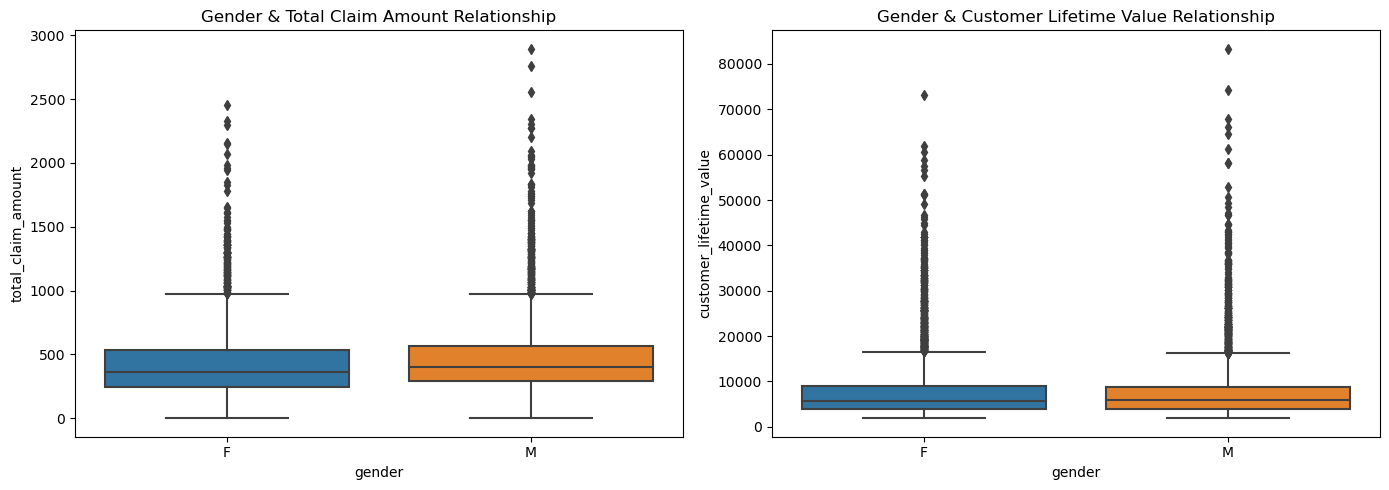

In [439]:
fig = plt.figure(figsize = (14,5))

#  subplot #1
plt.subplot(121)
plt.title('Gender & Total Claim Amount Relationship')
sns.boxplot(data = df, x = 'gender', y = 'total_claim_amount')

#  subplot #2
plt.subplot(122)
plt.title('Gender & Customer Lifetime Value Relationship')
sns.boxplot(data = df, x = 'gender', y = 'customer_lifetime_value')

plt.tight_layout()
plt.show()

We can see that gender affects neither the total claim amount nor the customer lifetime value. Thus, we can drop this column.

In [440]:
# checking response column (not really sure what this column represents)

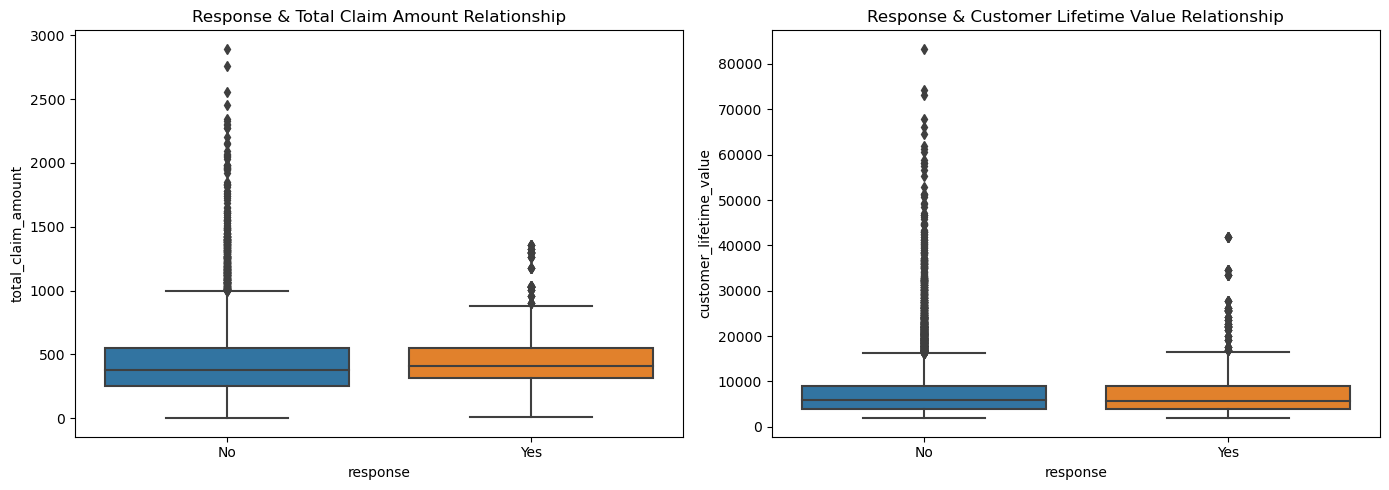

In [441]:
fig = plt.figure(figsize = (14,5))

#  subplot #1
plt.subplot(121)
plt.title('Response & Total Claim Amount Relationship')
sns.boxplot(data = df, x = 'response', y = 'total_claim_amount')

#  subplot #2
plt.subplot(122)
plt.title('Response & Customer Lifetime Value Relationship')
sns.boxplot(data = df, x = 'response', y = 'customer_lifetime_value')

plt.tight_layout()
plt.show()

In [442]:
categoricals.response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

Since this column is very imbalanced and we're not sure what it represents, it will be dropped.

In [443]:
X_cat = categoricals.drop(columns=['gender', 'response'])
X_cat.head()

,state,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,California,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,Washington,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car


### Checking for related categorical variables before encoding

In [444]:
# policy_type vs policy (considering the name and values, they are almost certainly related but will use chi2 test to double-check)

#### Hypotheses
* **H0** (Null Hypothesis) - assumes that there is no association between the two variables.

* **Ha** (Alternate Hypothesis) - assumes that there is an association between the two variables.

In [445]:
# Create Crosstab
policy_crosstab = pd.crosstab(X_cat.policy_type, X_cat.policy)
policy_crosstab

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


In [447]:
# Results
chi2, p_value, dof, expected_freq = chi2_contingency(policy_crosstab, correction=False)
print("The Chi2 value is: ",round(chi2,2))
print("The critical value is:", stats.chi2.ppf(1 - 0.05, df=dof).round(2))
print("The number of degrees of freedom is: ",dof)
print("The p-value is: ",p_value)
print("The expected frequencies are: ")
pd.DataFrame(expected_freq, columns=policy_crosstab.columns, index=policy_crosstab.index)

The Chi2 value is:  18268.0
The critical value is: 26.3
The number of degrees of freedom is:  16
The p-value is:  0.0
The expected frequencies are: 


policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,77.349683,128.197942,218.475148,267.168820,457.203416,738.161594,14.220276,35.335231,31.887891
Personal Auto,266.793519,442.178673,753.561638,921.515218,1576.980074,2546.057368,49.048391,121.877819,109.987300
Special Auto,14.856799,24.623385,41.963214,51.315962,87.816510,141.781038,2.731333,6.786950,6.124808


**Reject H0, columns are related. policy column will be dropped.**
- p-value is 0 which is less than alpha 0.05
- Chi2 value is much higher than the critical value of 26.296.

In [448]:
X_cat = X_cat.drop('policy', axis=1)
X_cat

,state,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class
0,Washington,Married,Corporate Auto,Offer1,Agent,Two-Door Car
1,Arizona,Single,Personal Auto,Offer3,Agent,Four-Door Car
2,Nevada,Married,Personal Auto,Offer1,Agent,Two-Door Car
3,California,Married,Corporate Auto,Offer1,Call Center,SUV
4,Washington,Single,Personal Auto,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...
9129,California,Married,Personal Auto,Offer2,Web,Four-Door Car
9130,California,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car
9131,California,Single,Corporate Auto,Offer1,Branch,Four-Door Car
9132,California,Married,Personal Auto,Offer3,Branch,Four-Door Car


### Encoding Categoricals

In [449]:
def encode(cat):
    '''cat = categorical variables dataframe to transform into dummies'''
    from sklearn.preprocessing import OneHotEncoder
    encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(cat)
    encoded = encoder.transform(cat).toarray()
    encoded = pd.DataFrame(encoded, index=cat.index)
    encoded.columns = encoder.get_feature_names_out() # for getting column names instead of numbers
    return encoded

In [450]:
X_cat_dummies = encode(X_cat)
X_cat_dummies.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [451]:
df.effective_to_date.nunique()

59

In [452]:
def transform_to_date(column):
    '''Transform date column to datetime'''
    import datetime as dt
    column = pd.to_datetime(column, errors='coerce')
    return column

In [453]:
df.effective_to_date = transform_to_date(df.effective_to_date)

In [454]:
df.effective_to_date

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [455]:
day_week = df.effective_to_date.dt.day_of_week

In [456]:
day_week.unique()

array([3, 0, 5, 1, 2, 6, 4])

In [457]:
month = df.effective_to_date.dt.month
month

0       2
1       1
2       2
3       1
4       2
       ..
9129    2
9130    2
9131    2
9132    2
9133    2
Name: effective_to_date, Length: 9134, dtype: int64

In [458]:
month.unique()

array([2, 1])

### Merge all the X dataframes (numerical continuous, ordinal and categorical variables)

In [459]:
y

0        2763.52
1        6979.54
2       12887.43
3        7645.86
4        2813.69
          ...   
9127     5032.17
9128     4100.40
9129    23405.99
9130     3096.51
9132     7524.44
Name: customer_lifetime_value, Length: 9117, dtype: float64

In [460]:
X = X_num.join(ordinal_cat).join(X_cat_dummies) #using join to merge on index automatically

In [461]:
# Add the day of the week and month columns derived from effective_to_date
X.insert(5, 'day_week', day_week)
X.insert(6, 'month', month)

In [462]:
X.head()

,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception,day_week,month,number_of_open_complaints,number_of_policies,coverage,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,56274.0000,69,384.81,32,5,3,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,59108.7738,94,1131.46,13,42,0,1,0,8,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48767.0000,108,566.47,18,38,5,2,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,39069.2262,106,529.88,18,65,3,1,0,7,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,43836.0000,73,138.13,12,44,3,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
